In [ ]:
import numpy as np

# Generate synthetic grayscale images (shape: 64x64, 1 channel)
X = np.random.rand(300, 64, 64, 1).astype(np.float32)

# Create labels: 0 = Healthy, 1 = Broken Rotor, 2 = Bearing Fault
y = np.array([0]*100 + [1]*100 + [2]*100)

# Shuffle the dataset
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Save the dataset as .npz
np.savez('motor_fault_data.npz', X=X, y=y)

print("✅ Synthetic dataset created and saved as motor_fault_data.npz")

✅ Synthetic dataset created and saved as motor_fault_data.npz


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step - accuracy: 0.3677 - loss: 1.1922 - val_accuracy: 0.3333 - val_loss: 1.1053
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.3061 - loss: 1.1165 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4017 - loss: 1.0933 - val_accuracy: 0.2917 - val_loss: 1.0971
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.3752 - loss: 1.0968 - val_accuracy: 0.3333 - val_loss: 1.1016
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.3093 - loss: 1.1000 - val_accuracy: 0.3333 - val_loss: 1.0968
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.4172 - loss: 1.0897 - val_accuracy: 0.3750 - val_loss: 1.0990
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.5063 - loss: 1.0837 - val_accuracy: 0.5000 - val_loss: 1.0951
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.4284 - loss: 1.0808 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


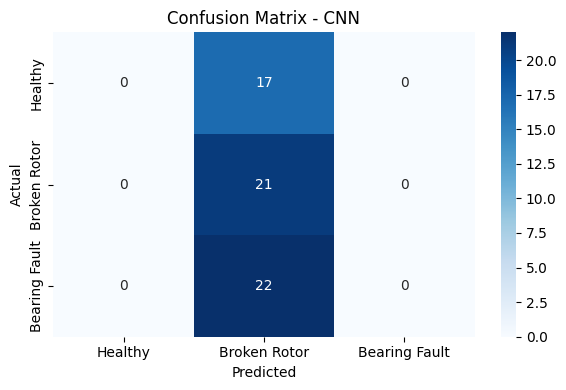

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training CNN...")
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

# Predict and show classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Healthy', 'Broken Rotor', 'Bearing Fault']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Broken Rotor', 'Bearing Fault'],
            yticklabels=['Healthy', 'Broken Rotor', 'Bearing Fault'])
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
samples_per_class = 100
t = np.linspace(0, 1, 1024)

# Healthy: clean sine wave + small noise
healthy_signals = [np.sin(2 * np.pi * 50 * t) + 0.05 * np.random.randn(len(t)) for _ in range(samples_per_class)]

# Broken Rotor: sine wave + random spikes
broken_signals = []
for _ in range(samples_per_class):
    signal = np.sin(2 * np.pi * 50 * t)
    spike_idx = np.random.choice(len(t), size=10, replace=False)
    signal[spike_idx] += np.random.uniform(1, 2, size=10)
    broken_signals.append(signal + 0.05 * np.random.randn(len(t)))

# Bearing Fault: sine wave + high-frequency noise
bearing_signals = [np.sin(2 * np.pi * 50 * t) + 0.3 * np.sin(2 * np.pi * 400 * t) + 0.05 * np.random.randn(len(t)) for _ in range(samples_per_class)]

# Combine and create labels
X_signals = np.array(healthy_signals + broken_signals + bearing_signals)
y_labels = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class)

# Shuffle
idx = np.random.permutation(len(X_signals))
X_signals = X_signals[idx]
y_labels = y_labels[idx]

# Save
np.savez("realistic_signals.npz", X=X_signals, y=y_labels)

print("✅ Signals generated and saved as 'realistic_signals.npz'")

✅ Signals generated and saved as 'realistic_signals.npz'


In [ ]:
import os
import pywt
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load signals
data = np.load('realistic_signals.npz')
X = data['X']
y = data['y']

# Output folder
output_dir = "scalograms"
os.makedirs(output_dir, exist_ok=True)

# Wavelet parameters
wavelet = 'morl'
scales = np.arange(1, 64)

# Generate scalogram images
print("🔄 Generating scalograms...")
for i in tqdm(range(len(X))):
    signal = X[i]
    label = y[i]

    coeffs, _ = pywt.cwt(signal, scales, wavelet)
    scalogram = np.abs(coeffs)

    # Normalize
    scaler = MinMaxScaler()
    scalogram = scaler.fit_transform(scalogram)

    # Save as image
    plt.imsave(f"{output_dir}/signal_{i}_label_{label}.png", scalogram, cmap='jet')

print("✅ Scalogram images saved in 'scalograms' folder.")

🔄 Generating scalograms...


100%|██████████| 300/300 [00:14<00:00, 20.51it/s]

✅ Scalogram images saved in 'scalograms' folder.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🚀 Training CNN on scalogram images...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 816ms/step - accuracy: 0.4320 - loss: 2.2954 - val_accuracy: 0.5000 - val_loss: 1.1295
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3551 - loss: 1.1346 - val_accuracy: 0.3333 - val_loss: 1.0953
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 755ms/step - accuracy: 0.3747 - loss: 1.0921 - val_accuracy: 0.3333 - val_loss: 1.0968
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 756ms/step - accuracy: 0.4674 - loss: 1.0728 - val_accuracy: 0.4167 - val_loss: 1.0645
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 742ms/step - accuracy: 0.4447 - loss: 1.0378 - val_accuracy: 0.3333 - val_loss: 0.9756
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 938ms/step - accuracy: 0.4608 - loss: 0.9504 - val_accuracy: 0.5417 - val_loss: 0.8781
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 724ms/step - accuracy: 0.5536 - loss: 0.8425 - val_accuracy: 0.5417 - val_loss: 0.7231
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - accuracy: 0.7270 - loss: 0.6

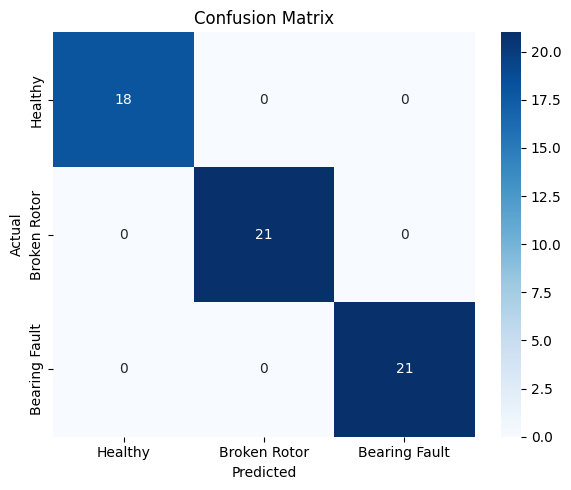

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load images
X = []
y = []

for filename in os.listdir("scalograms"):
    if filename.endswith(".png"):
        path = os.path.join("scalograms", filename)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))  # Resize for input
        X.append(img)
        label = int(filename.split("_")[-1].split(".")[0])
        y.append(label)

X = np.array(X).astype("float32") / 255.0
y = np.array(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("🚀 Training CNN on scalogram images...")
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Healthy', 'Broken Rotor', 'Bearing Fault']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Broken Rotor', 'Bearing Fault'],
            yticklabels=['Healthy', 'Broken Rotor', 'Bearing Fault'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_18']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


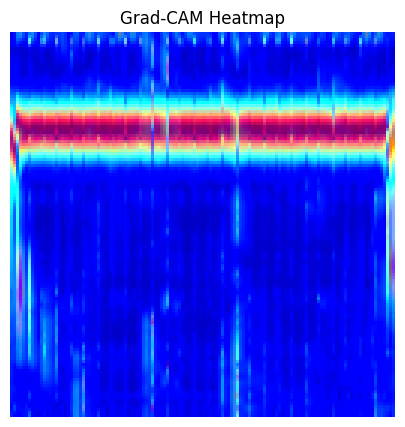

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Rebuild the model with explicit Input for Grad-CAM
input_img = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu', name='target_conv')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(3, activation='softmax')(x)

model_gradcam = Model(inputs=input_img, outputs=output)
model_gradcam.set_weights(model.get_weights())

# Grad-CAM function with safe max
def make_gradcam_heatmap(img_array, model, layer_name, class_index=None):
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        class_channel = predictions[:, class_index]
    grads = tape.gradient(class_channel, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0)
    max_val = tf.math.reduce_max(heatmap)
    if max_val != 0:
        heatmap /= max_val
    else:
        heatmap = tf.zeros_like(heatmap)
    return heatmap.numpy()

# Pick one test image
img = X_test[0]
img_input = np.expand_dims(img, axis=0)

# Generate heatmap
heatmap = make_gradcam_heatmap(img_input, model_gradcam, 'target_conv')

# Resize and overlay heatmap
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted((img * 255).astype(np.uint8), 1, heatmap_colored, 0.5, 0)

plt.figure(figsize=(6, 5))
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Heatmap")
plt.axis('off')
plt.show()

In [ ]:
classes = ['Healthy', 'Broken Rotor', 'Bearing Fault']
saved = {0: 0, 1: 0, 2: 0}  # to track 1 per class

for i in range(len(X_test)):
    label = y_test[i]
    if saved[label] >= 2:
        continue  # skip if already saved 2 for this class

    img = X_test[i]
    img_input = tf.convert_to_tensor(np.expand_dims(img, axis=0), dtype=tf.float32)
    heatmap = make_gradcam_heatmap(img_input, model_gradcam, 'target_conv')

    # Resize and overlay
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted((img * 255).astype(np.uint8), 1, heatmap_colored, 0.5, 0)

    # Save
    filename = f"gradcam_{classes[label].replace(' ', '_').lower()}_{saved[label]+1}.png"
    cv2.imwrite(filename, superimposed_img)
    saved[label] += 1

print("✅ Grad-CAM heatmaps saved for all classes.")

✅ Grad-CAM heatmaps saved for all classes.


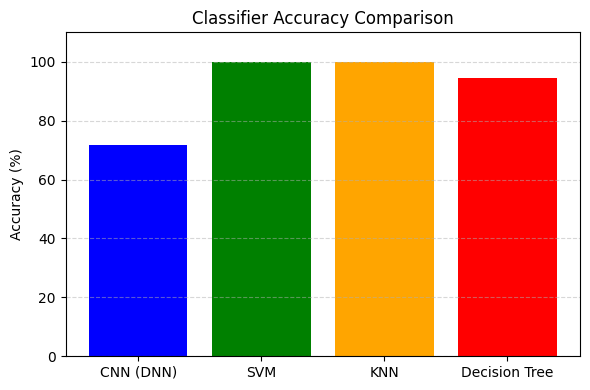

In [ ]:
import matplotlib.pyplot as plt

models = ['CNN (DNN)', 'SVM', 'KNN', 'Decision Tree']
accuracies = [71.67, 100, 100, 94.44]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('classifier_accuracy_comparison.png')
plt.show()

In [ ]:
data = np.load('motor_fault_data.npz')
X = data['X']
y = data['y']

print("✅ Dataset loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", np.unique(y))

✅ Dataset loaded successfully!
X shape: (300, 64, 64, 1)
y shape: (300,)
Unique labels: [0 1 2]
